# **Handling Mixed Variables**

In [1]:
import numpy as np
import pandas as pd
df = pd.read_csv('mixed.csv')

In [2]:
df.head()

,Cabin,Ticket,number,Survived
0,NaN,A/5 21171,5,0
1,C85,PC 17599,3,1
2,NaN,STON/O2. 3101282,6,1
3,C123,113803,3,1
4,NaN,373450,A,0


In [3]:
df['number'].unique()

array(['5', '3', '6', 'A', '2', '1', '4'], dtype=object)

Text(0.5, 1.0, 'Passengers travelling with')

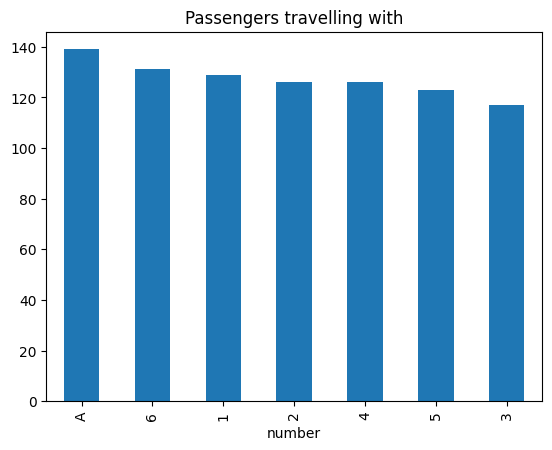

In [4]:
fig = df['number'].value_counts().plot.bar()
fig.set_title('Passengers travelling with')

In [5]:
# extract numerical part
df['number_numerical'] = pd.to_numeric(df["number"],errors='coerce',downcast='integer')
# extract categorical part
df['number_categorical'] = np.where(df['number_numerical'].isnull(),df['number'],np.nan)

df.head()

,Cabin,Ticket,number,Survived,number_numerical,number_categorical
0,NaN,A/5 21171,5,0,5.0,NaN
1,C85,PC 17599,3,1,3.0,NaN
2,NaN,STON/O2. 3101282,6,1,6.0,NaN
3,C123,113803,3,1,3.0,NaN
4,NaN,373450,A,0,NaN,A


In [7]:
df['Cabin'].unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

In [8]:
df['Ticket'].unique()

array(['A/5 21171', 'PC 17599', 'STON/O2. 3101282', '113803', '373450',
       '330877', '17463', '349909', '347742', '237736', 'PP 9549',
       '113783', 'A/5. 2151', '347082', '350406', '248706', '382652',
       '244373', '345763', '2649', '239865', '248698', '330923', '113788',
       '347077', '2631', '19950', '330959', '349216', 'PC 17601',
       'PC 17569', '335677', 'C.A. 24579', 'PC 17604', '113789', '2677',
       'A./5. 2152', '345764', '2651', '7546', '11668', '349253',
       'SC/Paris 2123', '330958', 'S.C./A.4. 23567', '370371', '14311',
       '2662', '349237', '3101295', 'A/4. 39886', 'PC 17572', '2926',
       '113509', '19947', 'C.A. 31026', '2697', 'C.A. 34651', 'CA 2144',
       '2669', '113572', '36973', '347088', 'PC 17605', '2661',
       'C.A. 29395', 'S.P. 3464', '3101281', '315151', 'C.A. 33111',
       'S.O.C. 14879', '2680', '1601', '348123', '349208', '374746',
       '248738', '364516', '345767', '345779', '330932', '113059',
       'SO/C 14885', '31012

In [15]:
df['Cabin_Number'] = df['Cabin'].str.extract(r'(\d+)') # captures numerical part
df['Cabin_class'] = df['Cabin'].str.extract(r'([A-Za-z]+)')  # captures the first letter

df.sample(10)

,Cabin,Ticket,number,Survived,number_numerical,number_categorical,Cabin_Number,Cabin_class
396,NaN,350407,2,0,2.0,NaN,NaN,NaN
262,E67,110413,4,0,4.0,NaN,67,E
505,C65,PC 17758,4,0,4.0,NaN,65,C
39,NaN,2651,6,1,6.0,NaN,NaN,NaN
810,NaN,3474,5,0,5.0,NaN,NaN,NaN
518,NaN,226875,3,1,3.0,NaN,NaN,NaN
809,E8,113806,5,1,5.0,NaN,8,E
437,NaN,29106,6,1,6.0,NaN,NaN,NaN
428,NaN,364851,2,0,2.0,NaN,NaN,NaN
170,B19,111240,6,0,6.0,NaN,19,B


<Axes: xlabel='Cabin_class'>

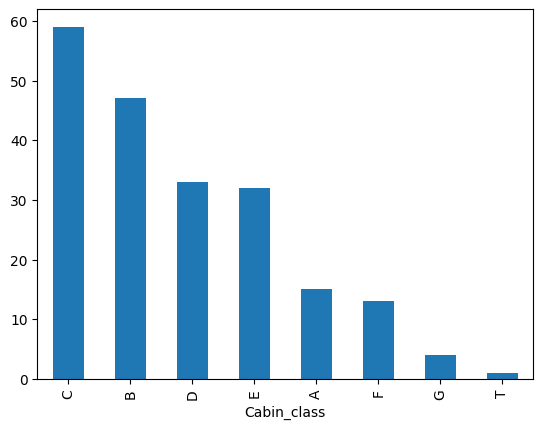

In [17]:
df['Cabin_class'].value_counts().plot(kind='bar')

In [19]:
# for Ticket columns
#extract the ticket number
df['Ticket_Number'] = df['Ticket'].str.extract(r'(\d+)')
df['Ticket_Number'] = pd.to_numeric(df['Ticket_Number'], errors='coerce')

#Extract Ticket Categories
df['Ticket_cat'] = df['Ticket'].str.extract(r'([A-Za-z./]+)')

df.head()


,Cabin,Ticket,number,Survived,number_numerical,number_categorical,Cabin_Number,Cabin_class,Ticket_Number,Ticket_cat
0,NaN,A/5 21171,5,0,5.0,NaN,NaN,NaN,5.0,A/
1,C85,PC 17599,3,1,3.0,NaN,85,C,17599.0,PC
2,NaN,STON/O2. 3101282,6,1,6.0,NaN,NaN,NaN,2.0,STON/O
3,C123,113803,3,1,3.0,NaN,123,C,113803.0,NaN
4,NaN,373450,A,0,NaN,A,NaN,NaN,373450.0,NaN


##  What I Did Wrong

```python
df['Ticket_Number'] = df['Ticket'].str.extract(r'(\d+)')


Problem:

1) \d+ extracts the first digit group it finds in the string.
2) Regex scans left → right.
3) .str.extract() stops at the first match, so it does NOT extract the full ticket number.

Examples:-

Ticket value: "A/5 21171"
Extracted: 5 
Correct: 21171 

Ticket value: "STON/O2. 3101282"
Extracted: 2 
Correct: 3101282 

| Symbol    | Meaning             |
| --------- | ------------------- |
| ^         | Start of string     |
| $         | End of string       |
| \d+       | One or more digits  |
| [A-Za-z]+ | One or more letters |


In [22]:
# Extract number in ticket
df['Ticket_Number'] = df['Ticket'].str.extract(r'(\d+)$')
df['Ticket_Number'] = pd.to_numeric(df['Ticket_Number'], errors='coerce')

# Extract prefix at beginning
df['Ticket_cat'] = df['Ticket'].str.extract(r'^([A-Za-z./]+)')


In [23]:
df.sample(20)

,Cabin,Ticket,number,Survived,number_numerical,number_categorical,Cabin_Number,Cabin_class,Ticket_Number,Ticket_cat
234,NaN,C.A. 29566,6,0,6.0,NaN,NaN,NaN,29566.0,C.A.
453,C92,17453,5,1,5.0,NaN,92,C,17453.0,NaN
676,NaN,342826,3,0,3.0,NaN,NaN,NaN,342826.0,NaN
507,NaN,111427,A,1,NaN,A,NaN,NaN,111427.0,NaN
883,NaN,C.A./SOTON 34068,1,0,1.0,NaN,NaN,NaN,34068.0,C.A./SOTON
430,C52,110564,A,1,NaN,A,52,C,110564.0,NaN
325,C32,PC 17760,6,1,6.0,NaN,32,C,17760.0,PC
74,NaN,1601,6,1,6.0,NaN,NaN,NaN,1601.0,NaN
810,NaN,3474,5,0,5.0,NaN,NaN,NaN,3474.0,NaN
53,NaN,2926,4,1,4.0,NaN,NaN,NaN,2926.0,NaN


In [25]:
df['Ticket_cat'].unique()

array(['A/', 'PC', 'STON/O', nan, 'PP', 'C.A.', 'A./', 'SC/Paris',
       'S.C./A.', 'CA', 'S.P.', 'S.O.C.', 'SO/C', 'W./C.', 'SOTON/OQ',
       'W.E.P.', 'A', 'C', 'SOTON/O.Q.', 'SC/PARIS', 'S.O.P.', 'A.', 'Fa',
       'CA.', 'LINE', 'F.C.C.', 'W/C', 'SW/PP', 'SCO/W', 'P/PP', 'SC',
       'SC/AH', 'A/S', 'WE/P', 'S.W./PP', 'S.O./P.P.', 'F.C.', 'SOTON/O',
       'S.C./PARIS', 'C.A./SOTON'], dtype=object)

Mixed variable handling:
- Use regex to separate alphabetic and numeric parts.
- .str.extract(r'([A-Za-z]+)') → Extract letters
- .str.extract(r'(\d+)') → Extract numbers
- Convert numbers to float
- Encode categorical part separately
